In [81]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image as img
import cv2
import requests
import numpy as np
from io import BytesIO
import urllib

In [14]:
data = pd.read_csv('./data/HAM10000_metadata.csv')

In [15]:
data['path'] = './data/HAM10000/' + data['image_id'] + '.jpg'

In [16]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,./data/HAM10000/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,./data/HAM10000/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,./data/HAM10000/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,./data/HAM10000/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,./data/HAM10000/ISIC_0031633.jpg


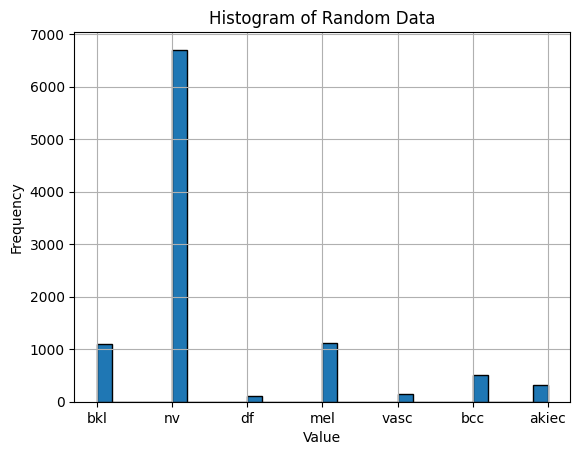

In [17]:
plt.hist(data['dx'], bins=30, edgecolor='black')
plt.title('Histogram of Random Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [18]:
one_hot = pd.get_dummies(data['dx'])

In [19]:
one_hot.head()

,akiec,bcc,bkl,df,mel,nv,vasc
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [20]:
data = pd.concat([data, one_hot], axis=1)

In [21]:
data

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,akiec,bcc,bkl,df,mel,nv,vasc
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,./data/HAM10000/ISIC_0027419.jpg,0,0,1,0,0,0,0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,./data/HAM10000/ISIC_0025030.jpg,0,0,1,0,0,0,0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,./data/HAM10000/ISIC_0026769.jpg,0,0,1,0,0,0,0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,./data/HAM10000/ISIC_0025661.jpg,0,0,1,0,0,0,0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,./data/HAM10000/ISIC_0031633.jpg,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,./data/HAM10000/ISIC_0033084.jpg,1,0,0,0,0,0,0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,./data/HAM10000/ISIC_0033550.jpg,1,0,0,0,0,0,0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,./data/HAM10000/ISIC_0033536.jpg,1,0,0,0,0,0,0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,./data/HAM10000/ISIC_0032854.jpg,1,0,0,0,0,0,0


In [22]:
image = np.array(cv2.imread(data['path'][0], cv2.IMREAD_GRAYSCALE))
print(image)

[[164 164 166 ... 169 170 170]
 [165 167 168 ... 169 171 170]
 [164 168 169 ... 169 171 169]
 ...
 [137 135 138 ... 157 155 153]
 [135 136 136 ... 158 155 154]
 [133 133 134 ... 158 157 153]]


In [23]:
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)    
    if image is not None:
        image = cv2.resize(image, (28,28))
        image = image.astype(np.float32) / 255.0
    return image

In [24]:
images = [load_image(image_path) for image_path in data['path']]
images = np.array(images)

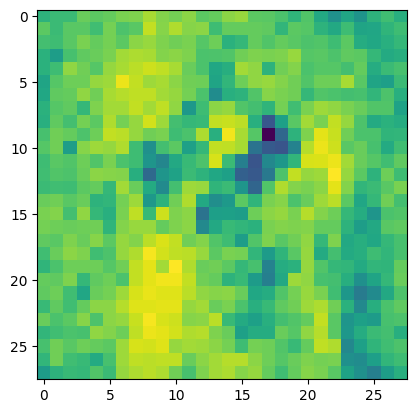

In [25]:
plt.imshow(images[0])
plt.show()

In [26]:
images[0].shape

(28, 28)

In [27]:
targets = data[['akiec','bcc','bkl','df','mel','nv','vasc']].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    images, targets, test_size=0.2, random_state=42)

In [29]:
len(X_train)

8012

In [30]:
len(X_test)

2003

In [31]:
EarlyStop = keras.callbacks.EarlyStopping(min_delta=0.001, patience=10, verbose=0)

model = keras.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(40, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(7, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                        

Epoch 1/100
251/251 [==============================] - 2s 6ms/step - loss: 1.3593 - accuracy: 0.5720 - val_loss: 1.3547 - val_accuracy: 0.6415
Epoch 2/100
251/251 [==============================] - 2s 7ms/step - loss: 1.0596 - accuracy: 0.6623 - val_loss: 1.0194 - val_accuracy: 0.6715
Epoch 3/100
251/251 [==============================] - 2s 7ms/step - loss: 1.0018 - accuracy: 0.6756 - val_loss: 1.0480 - val_accuracy: 0.6440
Epoch 4/100
251/251 [==============================] - 1s 6ms/step - loss: 0.9617 - accuracy: 0.6827 - val_loss: 0.8891 - val_accuracy: 0.6890
Epoch 5/100
251/251 [==============================] - 2s 6ms/step - loss: 0.9379 - accuracy: 0.6886 - val_loss: 0.9168 - val_accuracy: 0.6930
Epoch 6/100
251/251 [==============================] - 1s 6ms/step - loss: 0.9177 - accuracy: 0.6917 - val_loss: 1.0365 - val_accuracy: 0.6815
Epoch 7/100
251/251 [==============================] - 2s 7ms/step - loss: 0.8997 - accuracy: 0.6927 - val_loss: 0.9909 - val_accuracy: 0.6570

<AxesSubplot:>

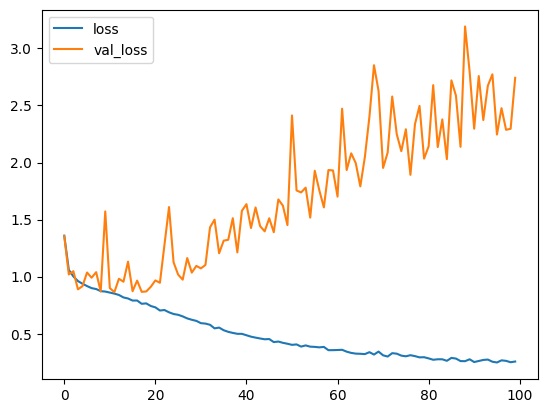

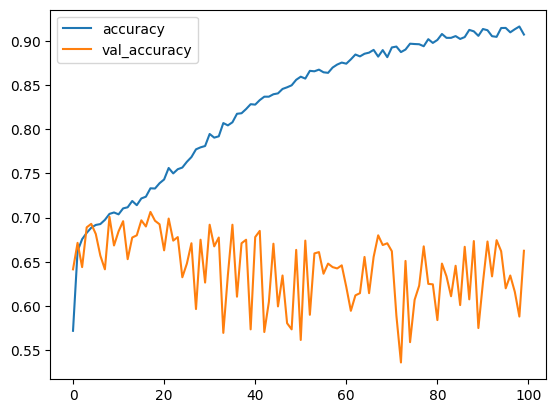

In [33]:
train = model.fit(X_train, y_train,
                  batch_size=32,
                  epochs=100,
                  validation_data=(X_test, y_test))

history_df = pd.DataFrame(train.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

print('---------------------------------------------------------------------------------------')

history_df = pd.DataFrame(train.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

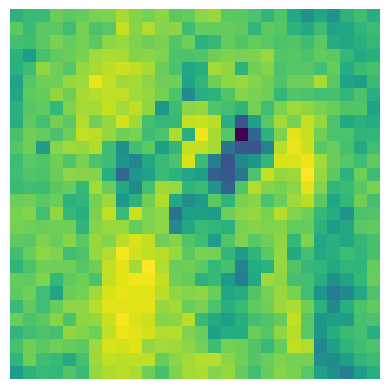

In [34]:
image = images[0]
plt.imshow(image)
plt.axis('off')
plt.show()

In [75]:
test_image = image.reshape(1, 28, 28, 1)
predictions = model.predict(test_image)
arr = np.round(predictions)
print(arr)

1/1 [==============================] - 0s 26ms/step
[[1. 0. 0. 0. 0. 0. 0.]]


In [76]:
diseases = ['Actinic Keratoses and Intraepithelial Carcinoma',
    'Basal Cell Carcinoma', 'Benign', 'Dermatofibroma', 'Melanoma', 'Melanocytic Nevi', 'Vascular Lesions']

In [77]:
def get_disease_from_array(arr, diseases):
    for i, val in enumerate(arr[0]):
        if val == 1:
            return diseases[i]
    return None

In [78]:
result = get_disease_from_array(arr, diseases)
print(result)

Actinic Keratoses and Intraepithelial Carcinoma


In [36]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,akiec,bcc,bkl,df,mel,nv,vasc
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,./data/HAM10000/ISIC_0027419.jpg,0,0,1,0,0,0,0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,./data/HAM10000/ISIC_0025030.jpg,0,0,1,0,0,0,0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,./data/HAM10000/ISIC_0026769.jpg,0,0,1,0,0,0,0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,./data/HAM10000/ISIC_0025661.jpg,0,0,1,0,0,0,0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,./data/HAM10000/ISIC_0031633.jpg,0,0,1,0,0,0,0


In [43]:
model.save("./weights/train_1.h5")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [84]:
def get_image_from_url(url):
    req = urllib.request.urlopen(url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, -1)
    return img

In [85]:
response = get_image_from_url('https://whqnperemsymnmpfsoyi.supabase.co/storage/v1/object/public/pictures/ISIC_0024306.jpg')

HTTPError: HTTP Error 403: Forbidden